# Data Clustering

1. The source data is not suitable for clustering and this report only aims to practice the clustering method
2. Hypothetically, our data could be partitioned into three clusters
3. The following features are provided:
    - Job Title, Rating, Company Name, Location, Headquarters, Type of ownership, Industry, Sector, lower_salary, upper_bound Minimum Size, Maximum Size
4. We use Kmeans for the clustering

In [1]:
# import
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder

# --------------------------PREPARE THE DATA--------------------------

##### 1. Load df

In [2]:
df_scientist = pd.read_excel("Cleaned_DataScientist.xlsx", engine='openpyxl')
df_analyst = pd.read_excel("Cleaned_DataAnalyst.xlsx", engine='openpyxl')
df_engineer = pd.read_excel("Cleaned_DataEngineer.xlsx", engine='openpyxl')

##### 2. Add domain for clustering`

In [3]:
df_scientist['Domain'] = 0 #'Scientist'
df_analyst['Domain'] = 1 # 'Analyst'
df_engineer['Domain'] = 2 # 'Engineer'

In [4]:
# Combine three dataframes
df_all = pd.concat([df_scientist, df_analyst, df_engineer], ignore_index=True, sort=False)
df_all = df_all[["Job Title", "Rating", "Company Name", "Location", "Headquarters", "Type of ownership", "Industry", "Sector", "lower_salary", "upper_bound", "Minimum Size", "Maximum Size", "Domain"]]
df_all = df_all.replace([np.inf, -np.inf], np.nan)
df_all = df_all.dropna()
df_all.head(5)

,Job Title,Rating,Company Name,Location,Headquarters,Type of ownership,Industry,Sector,lower_salary,upper_bound,Minimum Size,Maximum Size,Domain
0,Senior Data Scientist,3.5,Hopper,"New York, NY","Montreal, Canada",Company - Private,Travel Agencies,Travel & Tourism,111000.0,181000,501,1000.0,0
1,"Data Scientist, Product Analytics",4.5,Noom US,"New York, NY","New York, NY",Company - Private,"Health, Beauty, & Fitness",Consumer Services,111000.0,181000,1001,5000.0,0
2,Data Science Manager,-1.0,Decode_M,"New York, NY","New York, NY",Unknown,-1,-1,111000.0,181000,1,50.0,0
3,Data Analyst,3.4,Sapphire Digital,"Lyndhurst, NJ","Lyndhurst, NJ",Company - Private,Internet,Information Technology,111000.0,181000,201,500.0,0
4,"Director, Data Science",3.4,United Entertainment Group,"New York, NY","New York, NY",Company - Private,Advertising & Marketing,Business Services,111000.0,181000,51,200.0,0


##### 3. Prepare x label and y label 

Note that the y label is used for testing

In [5]:
x_df = df_all.drop('Domain', axis = 1)
x_df[['Job Title','Company Name','Location', 'Headquarters','Type of ownership','Industry','Sector']] = x_df[['Job Title','Company Name','Location', 'Headquarters','Type of ownership','Industry','Sector']].apply(LabelEncoder().fit_transform)
y_df = df_all['Domain']
y_df

0       0
1       0
2       0
3       0
4       0
       ..
8685    2
8686    2
8687    2
8688    2
8689    2
Name: Domain, Length: 6763, dtype: int64

In [6]:
x_df.head(10)

,Job Title,Rating,Company Name,Location,Headquarters,Type of ownership,Industry,Sector,lower_salary,upper_bound,Minimum Size,Maximum Size
0,2322,3.5,1250,184,429,2,96,25,111000.0,181000,501,1000.0
1,1119,4.5,1852,184,458,2,48,8,111000.0,181000,1001,5000.0
2,1000,-1.0,788,184,458,14,0,0,111000.0,181000,1,50.0
3,513,3.4,2310,158,386,2,56,13,111000.0,181000,201,500.0
4,1259,3.4,2808,184,458,2,2,6,111000.0,181000,51,200.0
5,1017,2.9,1289,184,288,2,55,14,111000.0,181000,201,500.0
6,1983,4.4,1948,184,458,2,57,10,111000.0,181000,51,200.0
7,1978,-1.0,939,184,458,14,0,0,111000.0,181000,1,50.0
8,25,5.0,1970,184,458,2,32,13,111000.0,181000,1,50.0
9,1983,4.8,1431,184,458,2,57,10,111000.0,181000,501,1000.0


# -------------------------------RESULTS----------------------------------

### 1. kMeans (with three clusters in the original data set)

##### 1.1 verifying using inertia

In [7]:
from sklearn.cluster import KMeans
inertia_lists=[]

for i in range(1,8):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(x_df)
    inertia_lists.append(kmeans.inertia_)

Note that for scikit learn, inertia is calculated as the sum of squared distance for each point to it's closest centroid, i.e., its assigned cluster.

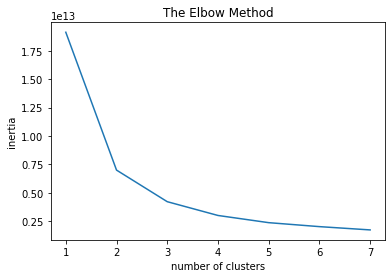

In [8]:
plt.plot(range(1,8), inertia_lists)
plt.title('The Elbow Method')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.show()

Using the elbow method, the data appeared to be partitioned into two clusters (which should be three hypothetically)

##### 1.2 verifying using true label

In [9]:
import numpy as np
from sklearn import metrics
scores=[]

label_true = y_df

for i in range(1,8):
    kmeans = KMeans(n_clusters= i, random_state=0)
    kmeans.fit(x_df)
    label_pred = kmeans.labels_
    score = metrics.v_measure_score(label_true, label_pred)
    scores.append(score)

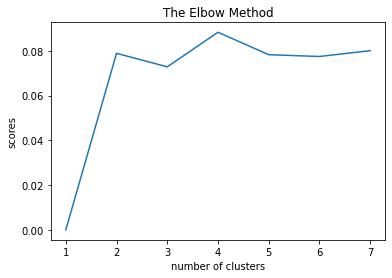

In [10]:
plt.plot(range(1,8), scores)
plt.title('The Elbow Method')
plt.xlabel('number of clusters')
plt.ylabel('scores')
plt.show()

Using the elbow method, the data appeared to be partitioned into four clusters (which should be three hypothetically)

##### 1.3 Plot the clustering result of Kmeans 

We plot the clustering result of Kmeans and then compare it with the ground truth value, the result demonstrates a significant difference between the prediction and the ground truth value

In [11]:
final_kmeans = KMeans(n_clusters= 3, init='k-means++', random_state=0)
y_kmeans= final_kmeans.fit_predict(x_df)

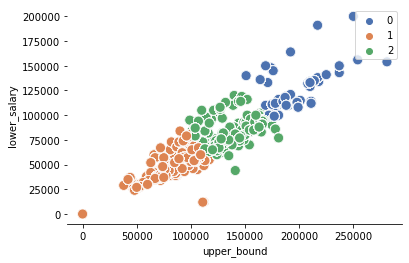

In [12]:
sns.scatterplot(x='upper_bound', y='lower_salary', data=x_df, hue=y_kmeans, palette='deep', s=100, alpha=0.9)
sns.despine(left=True)

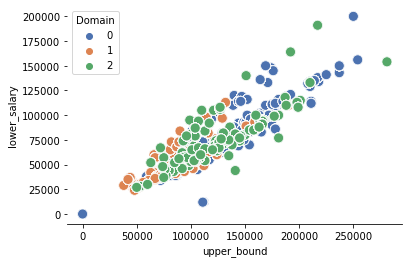

In [13]:
sns.scatterplot(x='upper_bound', y='lower_salary', data=x_df, hue=label_true, palette='deep', s=100, alpha=0.9)
sns.despine(left=True)

### 2 Clustering without "engineer" (the green dots)

In the original data set, we notice that values of "engineer" are relatively irregular. Therefore, we remove them in order to improve the clustering result (i.e., we only parittion "scientist" and "analyst")

##### 2.1 Re-construct the data set with only "scientist" and "analyst"

In [14]:
# Combine three dataframes
df_all_sa = pd.concat([df_scientist, df_analyst], ignore_index=True, sort=False)
df_all_sa = df_all_sa[["Job Title", "Rating", "Company Name", "Location", "Headquarters", "Type of ownership", "Industry", "Sector", "lower_salary", "upper_bound", "Minimum Size", "Maximum Size", "Domain"]]
df_all_sa = df_all_sa.replace([np.inf, -np.inf], np.nan)
df_all_sa = df_all_sa.dropna()

In [15]:
x_df_sa = df_all_sa.drop('Domain', axis = 1)
x_df_sa[['Job Title','Company Name','Location', 'Headquarters','Type of ownership','Industry','Sector']] = x_df_sa[['Job Title','Company Name','Location', 'Headquarters','Type of ownership','Industry','Sector']].apply(LabelEncoder().fit_transform)
y_df_sa = df_all_sa['Domain']

##### 2.2 Plot the result

In [16]:
from sklearn.cluster import KMeans
inertia_lists=[]

for i in range(1,8):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(x_df_sa)
    inertia_lists.append(kmeans.inertia_)

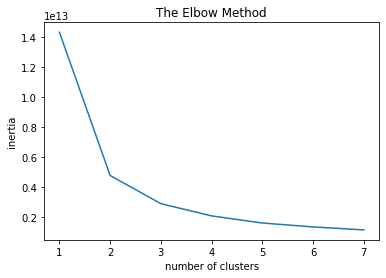

In [17]:
plt.plot(range(1,8), inertia_lists)
plt.title('The Elbow Method')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.show()

Using the elbow method, the data appeared to be partitioned into two clusters, which matches the hypothetical value

In [18]:
import numpy as np
from sklearn import metrics
scores=[]

label_true = y_df_sa

for i in range(1,8):
    kmeans = KMeans(n_clusters= i, random_state=0)
    kmeans.fit(x_df_sa)
    label_pred = kmeans.labels_
    score = metrics.v_measure_score(label_true, label_pred)
    scores.append(score)

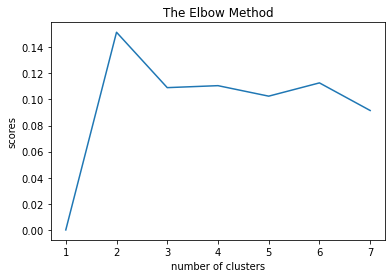

In [19]:
plt.plot(range(1,8), scores)
plt.title('The Elbow Method')
plt.xlabel('number of clusters')
plt.ylabel('scores')
plt.show()

Using the elbow method, the data appeared to be partitioned into two clusters, which matches the hypothetical value

##### 2.3 Plot the clustering result of Kmeans

We plot the clustering result of Kmeans and then compare it with the ground truth value, the result demonstrates that the prediction is improved when there are only two domains in the data set

In [20]:
final_kmeans = KMeans(n_clusters= 2, init='k-means++', random_state=0)
y_kmeans= final_kmeans.fit_predict(x_df_sa)

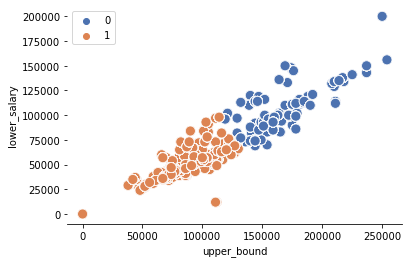

In [21]:
sns.scatterplot(x='upper_bound', y='lower_salary', data=x_df_sa, hue=y_kmeans, palette='deep', s=100, alpha=0.9)
sns.despine(left=True)

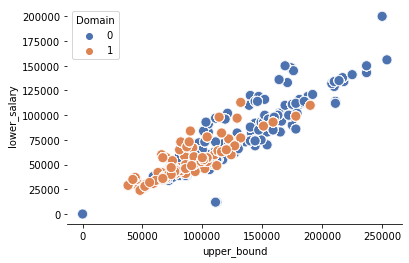

In [22]:
sns.scatterplot(x='upper_bound', y='lower_salary', data=x_df_sa, hue=label_true, palette='deep', s=100, alpha=0.9)
sns.despine(left=True)

# -------------------------CONCLUSION-----------------------------------

1. When there are three clusters in the original data set, the result demonstrates a significant difference between the prediction and the ground truth value
2. When there are two clusters in the original data set, the prediction result is improved 